# Classification model using Random Forest

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


### 2. Upload Clinic data

In [2]:
path ='../../../../Data_preprocessing\Prediction PFS\RNA+Clinic joined\Clinical_data_and_RNA_30_Features_PFS.csv'
data = pd.read_csv(path)
data.head()

,Unnamed: 0,RNA_ID,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,PFS,TM_TC_Ratio,...,RP11-96O20.4,RP5-827C21.1,RPS12P26,SDR42E1,SNORD113-5,TARBP2,TRAV41,TRIM43B,VN2R17P,XPC
0,0,G138701_RCCBMS-00020-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,12.164384,1.374775,...,21.18753,27.40814,31.71139,30.26124,21.32743,29.60417,22.22154,21.9744,21.12857,32.24472
1,1,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.490411,1.374775,...,21.18753,29.25015,29.15373,29.12730,21.32743,29.61188,22.22154,21.9744,21.12857,32.15619
2,2,G138701_RCCBMS-00141-T_v1_RNA_OnPrem,62.0,0.0,0.0,1.0,707.0,0.0,61.906849,1.374775,...,21.18753,23.03429,29.37858,27.22907,21.32743,31.90343,22.22154,21.9744,21.12857,31.86536
3,3,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,62.0,0.0,0.0,3.0,707.0,0.0,1.249315,1.374775,...,21.18753,23.03429,30.19136,22.83731,21.32743,30.35424,22.22154,21.9744,21.12857,31.63561
4,4,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.654795,1.374775,...,21.18753,23.03429,31.82172,22.83731,21.32743,31.60946,22.22154,21.9744,21.12857,33.12717


In [3]:
Y = [] # Target column
# For each entry I classified it by its PFS value.
for i in range (len(data)):
    if data.PFS[i]<3: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    elif data.PFS[i]<6: # If PFS is over 6 months, I will consider it as Responder (R)
        Y.append(1)
    else:
        Y.append(2) # If PFS is between 3 and 6 months, I will consider it as SemiResponder (SR)
        

data = data.drop('PFS', axis=1)
data = data.drop('RNA_ID', axis=1)

print(data.head())
X = data.iloc[:,1:57] 
# I selected all the columns by removing the Unnamed column (row id) and the Target column.
print(X)
print('Numero de pacientes: ',len(Y))

   Unnamed: 0   Age  Sarc  Rhab  Number_of_Prior_Therapies  \
0           0  62.0   0.0   0.0                        2.0   
1           1  62.0   0.0   0.0                        2.0   
2           2  62.0   0.0   0.0                        1.0   
3           3  62.0   0.0   0.0                        3.0   
4           4  62.0   0.0   0.0                        2.0   

   Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy  \
0                                              707.0             
1                                              707.0             
2                                              707.0             
3                                              707.0             
4                                              707.0             

   Tumor_Shrinkage  TM_TC_Ratio  Cohort_CM-009  Cohort_CM-010  ...  \
0              0.0     1.374775              0              1  ...   
1              0.0     1.374775              0              1  ...   
2              0.0  

### 3. Train-Test dataset split

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125)

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


In [5]:
param_grid = {'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3, 4, 5],
              'random_state':[125],
              'n_estimators': [10, 20],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'max_depth':[None, 2, 5, 10,50]
              }

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(
        estimator  = RandomForestClassifier(),
        param_grid = param_grid,
        cv=5
       )

clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 10, 50],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20], 'random_state': [125]})

In [6]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
# Fit the model with the best parameters
model.fit(XTrain , yTrain)

Best estimate of parameters according to GridSearchCV:


RandomForestClassifier(max_depth=10, min_samples_split=4, n_estimators=20,
                       random_state=125)

In [7]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.5761083743842365


### 5. Prediction

In [8]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [9]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1


### 6. Results

In [10]:
print('Final accuracy on the training dataset:' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(yTest)))

Final accuracy on the training dataset:0.9930555555555556
Final accuracy on the testing dataset: 0.5135135135135135


In [11]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[65  0  0]
 [ 0 28  0]
 [ 1  0 50]]
Input data:  [0 2 1 1 1 1 0 2 0 1 2 2 1 0 2 0 2 0 0 0 2 1 0 0 2 2 0 1 0 0 1 1 0 2 1 0 1
 2 0 2 2 0 0 1 0 1 1 0 1 0 0 1 0 0 0 2 0 2 0 2 1 0 2 2 0 2 2 2 0 2 0 2 0 2
 2 0 0 2 0 0 1 2 1 0 0 0 0 2 1 2 2 0 0 2 2 2 2 0 0 0 2 0 2 0 0 0 0 1 0 2 0
 2 0 2 1 0 0 0 0 1 2 2 0 2 0 2 2 0 1 2 0 1 2 0 0 2 2 1 2 1 2 2 0 0]
Prediction:        [0 2 1 1 1 1 0 2 0 1 2 2 1 0 2 0 2 0 0 0 2 1 0 0 2 2 0 1 0 0 1 1 0 2 1 0 1
 2 0 2 2 0 0 1 0 1 1 0 1 0 0 1 0 0 0 2 0 2 0 2 1 0 2 2 0 2 2 2 0 2 0 2 0 2
 2 0 0 2 0 0 1 2 1 0 0 0 0 2 1 2 2 0 0 0 2 2 2 0 0 0 2 0 2 0 0 0 0 1 0 2 0
 2 0 2 1 0 0 0 0 1 2 2 0 2 0 2 2 0 1 2 0 1 2 0 0 2 2 1 2 1 2 2 0 0]


In [12]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        65
           1       1.00      1.00      1.00        28
           2       1.00      0.98      0.99        51

    accuracy                           0.99       144
   macro avg       0.99      0.99      0.99       144
weighted avg       0.99      0.99      0.99       144



In [13]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[14  1  5]
 [ 2  0  1]
 [ 8  1  5]]
Input data:  [1 0 0 2 2 1 0 2 2 2 0 0 0 0 0 0 2 0 1 0 0 0 0 2 0 0 2 2 2 0 0 2 0 0 2 2 2]
Prediction:        [0 2 0 0 0 2 0 1 2 0 0 2 0 0 2 0 2 0 0 0 0 2 2 0 1 0 2 2 0 0 0 0 0 0 0 2 0]


In [14]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       0.58      0.70      0.64        20
           1       0.00      0.00      0.00         3
           2       0.45      0.36      0.40        14

    accuracy                           0.51        37
   macro avg       0.35      0.35      0.35        37
weighted avg       0.49      0.51      0.50        37



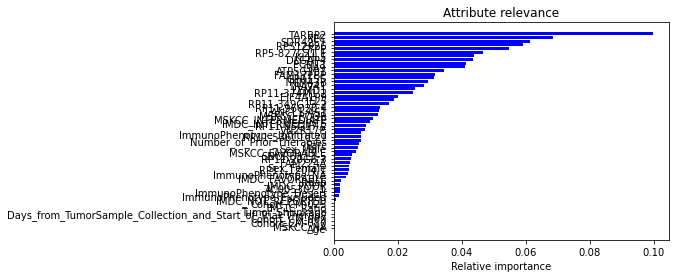

Age = 0.0
Sarc = 0.007931922495724735
Rhab = 0.002207290002286617
Number_of_Prior_Therapies = 0.008396554423393012
Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy = 0.0
Tumor_Shrinkage = 0.0
TM_TC_Ratio = 0.0
Cohort_CM-009 = 0.0
Cohort_CM-010 = 0.0
Cohort_CM-025 = 0.00010898329743007525
Sex_Female = 0.00487037459877248
Sex_Male = 0.007577692101339148
MSKCC_FAVORABLE = 0.006951765498466237
MSKCC_INTERMEDIATE = 0.012301383312766192
MSKCC_NA = 0.0
MSKCC_POOR = 0.013944660927794991
IMDC_FAVORABLE = 0.003952634972403724
IMDC_INTERMEDIATE = 0.011223595634139424
IMDC_NOT_REPORTED = 0.0006076680107101488
IMDC_POOR = 0.001996987568550928
ImmunoPhenotype_Desert = 0.001899119285156709
ImmunoPhenotype_Excluded = 0.0015662980588174876
ImmunoPhenotype_Infiltrated = 0.008617229439553939
ImmunoPhenotype_NA = 0.004554132215376076
AC005307.1 = 0.0019575632377923902
ATP5G2P1 = 0.034377306981713804
DLGAP4 = 0.043564943144742005
EIF4A1P9 = 0.02001577929062904
FAM172BP = 0.031655111673038715
FAM

In [15]:
# Through the created model we can see which attributes are the most significant to make a decision.
# The most relevant attributes will be the ones placed at the top of the tree.
features = list(X)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Attribute relevance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

for name, importance in zip(X, model.feature_importances_):
    print(name, "=", importance)

# Attributes whose relevance is 0, will not be necessary to make the prediction of the target.